# 1. Asian and Indian Cuisines (2.0 điểm)

Cho dữ liệu asian_indian_recipes.csv chứa công thức (thành phần) nấu ăn của các món ăn một số nước châu Á như Hàn Quốc, Nhật Bản, Trung Quốc, Thái và Ấn Độ.

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc xác định một mẫu có ”cuisine” là nước nào dựa trên các thông tin được cung cấp.

### Tiền xử lý dữ liệu

In [1]:
# thư viện
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn.naive_bayes import GaussianNB as gnb,BernoulliNB as bnb,MultinomialNB as mnb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
recipes = pd.read_csv('asian_indian_recipes.csv')
if recipes.isna().any().any(): # Kiểm tra dữ liệu Null
    print('Có dữ liệu Null.')
else:
    print('Không có dữ liệu Null.')

Không có dữ liệu Null.


In [3]:
print('Dữ liệu có {} dòng, {} cột.'.format(recipes.shape[0],recipes.shape[1]))

Dữ liệu có 2448 dòng, 385 cột.


In [4]:
recipes.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
recipes.tail()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
2443,57686,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2444,57687,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2445,57688,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2446,57689,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2447,57690,japanese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('Thông tin dữ liệu.')
recipes.drop('Unnamed: 0',axis=1).info()

Thông tin dữ liệu.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 384 entries, cuisine to zucchini
dtypes: int64(383), object(1)
memory usage: 7.2+ MB


In [7]:
print('Mô tả dữ liệu.')
recipes.drop('Unnamed: 0',axis=1).describe()

Mô tả dữ liệu.


,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.0,2448.000000,2448.0,...,2448.0,2448.000000,2448.000000,2448.000000,2448.000000,2448.0,2448.000000,2448.000000,2448.000000,2448.000000
mean,0.018382,0.0,0.000408,0.002859,0.013889,0.0,0.005310,0.0,0.002451,0.0,...,0.0,0.000817,0.020833,0.004085,0.067810,0.0,0.001634,0.015523,0.059232,0.008578
std,0.134357,0.0,0.020211,0.053408,0.117054,0.0,0.072694,0.0,0.049457,0.0,...,0.0,0.028577,0.142855,0.063796,0.251472,0.0,0.040398,0.123645,0.236107,0.092241
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


**Chọn dữ liệu liên quan:** Chọn input X là các cột *từ almond đến zucchini*, và output y là cột *cuisine*. Dữ liệu cột *cuisine* ở dạng chuỗi cần được chuyển thành dạng số.

In [8]:
X = recipes[recipes.columns[2:]]
y = recipes.cuisine

In [9]:
cuisines = pd.unique(y)
cuisines

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [10]:
categories = [0,1,2,3,4]
y = y.replace(cuisines,categories)
X.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cuisine, dtype: int64

### 1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đã đọc và chuẩn hóa, với tỷ lệ dữ liệu test là 0.3

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?

### và 4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả.

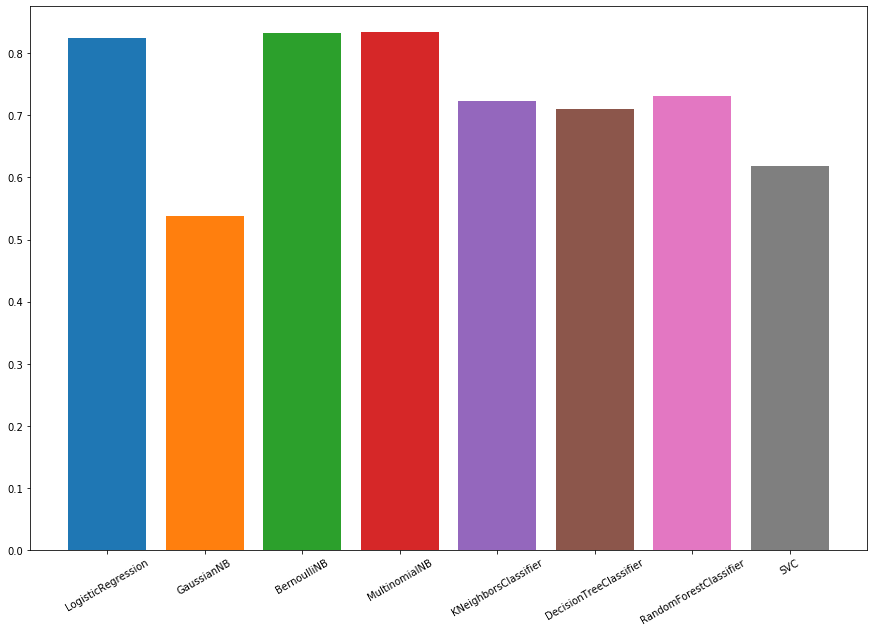

Model được chọn là MultinomialNB do có accuracy score cao nhất = 83.40%.


In [13]:
models = [lr(solver='lbfgs',multi_class='auto'),
          gnb(),bnb(),mnb(),
          knn(),dt(),rf(n_estimators=5),SVC(gamma='auto')]
acc = 0
bestmod = ''
labels = []
plt.figure(figsize=(15,10))
for m in models:
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    a = accuracy_score(y_test,y_pred)
    modname = m.__class__.__name__
    labels += [modname]
    plt.bar(modname,a)
    if a > acc:
        acc = a
        bestmod = modname
        clf = m
plt.xticks(rotation=30)
plt.show()
print('Model được chọn là {} do có accuracy score cao nhất = {:.2%}.'.format(bestmod,acc))

### 3. Đánh giá model dựa trên train/test.

In [14]:
clf.fit(X_train,y_train)
print('Train score = {:.2%}\nTest score = {:.2%}'.format(clf.score(X_train,y_train),clf.score(X_test,y_test)))

Train score = 81.79%
Test score = 83.40%


**Nhận xét:** Model không bị underfitting vì Train score và Test score chỉ chênh lệch ít.

### 5. Dựa trên kết quả, hãy cho biết nếu trong thành phần của món ăn có “cumin” và “fish” nhưng không có “yogurt” thì món ăn đó thường là món ăn của nước nào?

In [15]:
X_new = X[:1]*0
X_new.cumin = 1
X_new.fish = 1
y_new = clf.predict(X_new)
print(y_new)
print(cuisines[y_new])

[1]
['thai']


Nếu trong thành phần của món ăn có “cumin” và “fish” nhưng không có “yogurt” thì món ăn đó thường là món ăn của Thái Lan.

### 6. Dựa trên kết quả, hãy cho biết nếu trong thành phần của món ăn có “cumin” nhưng không có “fish” và không có “soy_sauce” thì món ăn đó thường là món ăn của nước nào?

In [16]:
X_new = X[:1]*0
X_new.cumin = 1
y_new = clf.predict(X_new)
print(y_new)
print(cuisines[y_new])

[0]
['indian']


Nếu trong thành phần của món ăn có “cumin” nhưng không có “fish” và không có “soy_sauce” thì món ăn đó thường là món ăn của Ấn Độ.

### 7. In nội dung confusion matrix sau đó trả lời các câu hỏi sau :

#### a. Tỷ lệ % các công thức món ăn của Nhật Bản được dự đoán chính xác ?

#### b. Tỷ lệ % các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản?

#### c. Nước nào có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất ?

In [17]:
y_pred = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=cuisines,index=cuisines)
cm

,indian,thai,chinese,japanese,korean
indian,167,5,1,3,1
thai,8,78,7,2,1
chinese,6,2,114,3,20
japanese,2,4,16,50,16
korean,3,3,13,6,204


In [18]:
err = 0
most_error = ''
for i in cuisines:
    e = 1 - cm[i][i]/cm.loc[i].sum()
    if e > err:
        err = e
        most_error = i
print('a. Tỷ lệ % các công thức món ăn của Nhật Bản được dự đoán chính xác là {:.2%}.'.format(cm.japanese.japanese/cm.loc['japanese'].sum()))
print('b. Tỷ lệ % các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản là {:.2%}.'.format(cm.japanese.korean/cm.loc['korean'].sum()))
print('c. {} có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất.'.format(i))

a. Tỷ lệ % các công thức món ăn của Nhật Bản được dự đoán chính xác là 56.82%.
b. Tỷ lệ % các công thức món ăn của Hàn Quốc bị gán sai nhãn thành Nhật Bản là 2.62%.
c. korean có tỷ lệ % các công thức món ăn bị gán nhãn sai nhiều nhất.
